In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
# Define the base path where the CSV files are located
base_path = r'C:\Users\user\Desktop\New folder (3)'

# List of stock symbols to load
stock_files = ['NFLX', 'GOOG', 'META', 'AAPL', 'AMZN']

# Initialize an empty list to hold DataFrames
dfs = []

# Get a list of all files in the folder
all_files = [f for f in os.listdir(base_path) if f.endswith('.csv')]

In [5]:
# Loop through each stock symbol and check if the corresponding file exists
for symbol in stock_files:
    file_name = f"{symbol}.csv"
    if file_name in all_files:  # Only process if file exists
        file_path = os.path.join(base_path, file_name)
        df = pd.read_csv(file_path)  # Load the CSV file
        df['company'] = symbol       # Add a 'company' column with the stock symbol
        dfs.append(df)               # Append DataFrame to list

# Concatenate all DataFrames in the list into a single DataFrame
stock_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(stock_df.head())

                        Date      Open      High       Low     Close  \
0  2002-05-23 00:00:00-04:00  1.156429  1.242857  1.145714  1.196429   
1  2002-05-24 00:00:00-04:00  1.214286  1.225000  1.197143  1.210000   
2  2002-05-28 00:00:00-04:00  1.213571  1.232143  1.157143  1.157143   
3  2002-05-29 00:00:00-04:00  1.164286  1.164286  1.085714  1.103571   
4  2002-05-30 00:00:00-04:00  1.107857  1.107857  1.071429  1.071429   

      Volume  Dividends  Stock Splits company  
0  104790000        0.0           0.0    NFLX  
1   11104800        0.0           0.0    NFLX  
2    6609400        0.0           0.0    NFLX  
3    6757800        0.0           0.0    NFLX  
4   10154200        0.0           0.0    NFLX  


In [6]:
stock_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000,0.0,0.0,NFLX
1,2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800,0.0,0.0,NFLX
2,2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400,0.0,0.0,NFLX
3,2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800,0.0,0.0,NFLX
4,2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200,0.0,0.0,NFLX
...,...,...,...,...,...,...,...,...,...
30441,2023-09-15 00:00:00-04:00,142.690002,143.570007,140.089996,140.389999,102861700,0.0,0.0,AMZN
30442,2023-09-18 00:00:00-04:00,140.479996,141.750000,139.220001,139.979996,42823500,0.0,0.0,AMZN
30443,2023-09-19 00:00:00-04:00,138.699997,138.839996,135.559998,137.630005,61482500,0.0,0.0,AMZN
30444,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46156500,0.0,0.0,AMZN


In [7]:
stock_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
company         0
dtype: int64

In [8]:
stock_df.shape
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30446 entries, 0 to 30445
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          30446 non-null  object 
 1   Open          30446 non-null  float64
 2   High          30446 non-null  float64
 3   Low           30446 non-null  float64
 4   Close         30446 non-null  float64
 5   Volume        30446 non-null  int64  
 6   Dividends     30446 non-null  float64
 7   Stock Splits  30446 non-null  float64
 8   company       30446 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.1+ MB


In [9]:
stock_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,30446.000000,30446.000000,30446.000000,30446.000000,3.044600e+04,30446.000000,30446.000000
mean,57.177485,57.946257,56.398846,57.190325,1.698656e+08,0.000248,0.002496
std,98.455095,99.846680,97.016037,98.454057,2.510867e+08,0.006648,0.176815
min,0.038483,0.038483,0.038050,0.038050,0.000000e+00,0.000000,0.000000
25%,1.562143,1.600000,1.520627,1.564286,2.735010e+07,0.000000,0.000000
50%,12.874120,12.998019,12.736129,12.887000,8.896425e+07,0.000000,0.000000
75%,70.345127,71.626964,69.445578,70.658148,1.992365e+08,0.000000,0.000000
max,692.349976,700.989990,686.090027,691.690002,7.421641e+09,0.240000,20.000000


In [10]:
#Changing the date from object to Date data type
stock_df['Date']=pd.to_datetime(stock_df['Date'],utc=True)

#Extract the year, month and day of week from Date Column
stock_df['Year']=stock_df['Date'].dt.year
stock_df['Month']=stock_df['Date'].dt.month
stock_df['Day of Week']=stock_df['Date'].dt.day_name()
stock_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,Year,Month,Day of Week
0,2002-05-23 04:00:00+00:00,1.156429,1.242857,1.145714,1.196429,104790000,0.0,0.0,NFLX,2002,5,Thursday
1,2002-05-24 04:00:00+00:00,1.214286,1.225000,1.197143,1.210000,11104800,0.0,0.0,NFLX,2002,5,Friday
2,2002-05-28 04:00:00+00:00,1.213571,1.232143,1.157143,1.157143,6609400,0.0,0.0,NFLX,2002,5,Tuesday
3,2002-05-29 04:00:00+00:00,1.164286,1.164286,1.085714,1.103571,6757800,0.0,0.0,NFLX,2002,5,Wednesday
4,2002-05-30 04:00:00+00:00,1.107857,1.107857,1.071429,1.071429,10154200,0.0,0.0,NFLX,2002,5,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
30441,2023-09-15 04:00:00+00:00,142.690002,143.570007,140.089996,140.389999,102861700,0.0,0.0,AMZN,2023,9,Friday
30442,2023-09-18 04:00:00+00:00,140.479996,141.750000,139.220001,139.979996,42823500,0.0,0.0,AMZN,2023,9,Monday
30443,2023-09-19 04:00:00+00:00,138.699997,138.839996,135.559998,137.630005,61482500,0.0,0.0,AMZN,2023,9,Tuesday
30444,2023-09-20 04:00:00+00:00,138.550003,139.369995,135.199997,135.289993,46156500,0.0,0.0,AMZN,2023,9,Wednesday


In [11]:
#Filter the dataset so that it has only data for the last 5 years
stock_df1=stock_df[stock_df['Year']>2018]
stock_df=stock_df1
stock_df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,Year,Month,Day of Week
4181,2019-01-02 05:00:00+00:00,259.279999,269.750000,256.579987,267.660004,11679500,0.0,0.0,NFLX,2019,1,Wednesday
4182,2019-01-03 05:00:00+00:00,270.200012,275.790009,264.429993,271.200012,14969600,0.0,0.0,NFLX,2019,1,Thursday
4183,2019-01-04 05:00:00+00:00,281.880005,297.799988,278.540009,297.570007,19330100,0.0,0.0,NFLX,2019,1,Friday
4184,2019-01-07 05:00:00+00:00,302.100006,316.799988,301.649994,315.339996,18620100,0.0,0.0,NFLX,2019,1,Monday
4185,2019-01-08 05:00:00+00:00,319.980011,320.589996,308.010010,320.269989,15359200,0.0,0.0,NFLX,2019,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
30441,2023-09-15 04:00:00+00:00,142.690002,143.570007,140.089996,140.389999,102861700,0.0,0.0,AMZN,2023,9,Friday
30442,2023-09-18 04:00:00+00:00,140.479996,141.750000,139.220001,139.979996,42823500,0.0,0.0,AMZN,2023,9,Monday
30443,2023-09-19 04:00:00+00:00,138.699997,138.839996,135.559998,137.630005,61482500,0.0,0.0,AMZN,2023,9,Tuesday
30444,2023-09-20 04:00:00+00:00,138.550003,139.369995,135.199997,135.289993,46156500,0.0,0.0,AMZN,2023,9,Wednesday


In [12]:
#Create a column to show daily returns
stock_df.loc[:,'Daily_return']=stock_df.groupby('company')['Close'].pct_change()*100
stock_df

C:\Users\user\AppData\Local\Temp\ipykernel_4920\503843168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df.loc[:,'Daily_return']=stock_df.groupby('company')['Close'].pct_change()*100


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,Year,Month,Day of Week,Daily_return
4181,2019-01-02 05:00:00+00:00,259.279999,269.750000,256.579987,267.660004,11679500,0.0,0.0,NFLX,2019,1,Wednesday,NaN
4182,2019-01-03 05:00:00+00:00,270.200012,275.790009,264.429993,271.200012,14969600,0.0,0.0,NFLX,2019,1,Thursday,1.322577
4183,2019-01-04 05:00:00+00:00,281.880005,297.799988,278.540009,297.570007,19330100,0.0,0.0,NFLX,2019,1,Friday,9.723449
4184,2019-01-07 05:00:00+00:00,302.100006,316.799988,301.649994,315.339996,18620100,0.0,0.0,NFLX,2019,1,Monday,5.971700
4185,2019-01-08 05:00:00+00:00,319.980011,320.589996,308.010010,320.269989,15359200,0.0,0.0,NFLX,2019,1,Tuesday,1.563390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30441,2023-09-15 04:00:00+00:00,142.690002,143.570007,140.089996,140.389999,102861700,0.0,0.0,AMZN,2023,9,Friday,-2.991986
30442,2023-09-18 04:00:00+00:00,140.479996,141.750000,139.220001,139.979996,42823500,0.0,0.0,AMZN,2023,9,Monday,-0.292046
30443,2023-09-19 04:00:00+00:00,138.699997,138.839996,135.559998,137.630005,61482500,0.0,0.0,AMZN,2023,9,Tuesday,-1.678805
30444,2023-09-20 04:00:00+00:00,138.550003,139.369995,135.199997,135.289993,46156500,0.0,0.0,AMZN,2023,9,Wednesday,-1.700219


In [13]:
#Add moving averages
stock_df.loc[:,'7_Day_MA']=stock_df.groupby('company')['Close'].transform(lambda x:x.rolling(7).mean())
stock_df.loc[:,'30_Day_MA']=stock_df.groupby('company')['Close'].transform(lambda x:x.rolling(30).mean())
stock_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_4920\1070897332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df.loc[:,'7_Day_MA']=stock_df.groupby('company')['Close'].transform(lambda x:x.rolling(7).mean())
C:\Users\user\AppData\Local\Temp\ipykernel_4920\1070897332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df.loc[:,'30_Day_MA']=stock_df.groupby('company')['Close'].transform(lambda x:x.rolling(30).mean())


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,Year,Month,Day of Week,Daily_return,7_Day_MA,30_Day_MA
4181,2019-01-02 05:00:00+00:00,259.279999,269.750000,256.579987,267.660004,11679500,0.0,0.0,NFLX,2019,1,Wednesday,NaN,NaN,NaN
4182,2019-01-03 05:00:00+00:00,270.200012,275.790009,264.429993,271.200012,14969600,0.0,0.0,NFLX,2019,1,Thursday,1.322577,NaN,NaN
4183,2019-01-04 05:00:00+00:00,281.880005,297.799988,278.540009,297.570007,19330100,0.0,0.0,NFLX,2019,1,Friday,9.723449,NaN,NaN
4184,2019-01-07 05:00:00+00:00,302.100006,316.799988,301.649994,315.339996,18620100,0.0,0.0,NFLX,2019,1,Monday,5.971700,NaN,NaN
4185,2019-01-08 05:00:00+00:00,319.980011,320.589996,308.010010,320.269989,15359200,0.0,0.0,NFLX,2019,1,Tuesday,1.563390,NaN,NaN


In [14]:
stock_df.drop(columns=['Daily_return%'],inplace=True)

KeyError: "['Daily_return%'] not found in axis"

In [ ]:
stock_df

In [ ]:
# Highest and lowest closing price for each company
Highest_lowest=stock_df.groupby('company')['Close'].agg(['max','min'])
Highest_lowest

In [ ]:
# Which month and day of the week had the highest average closing prices
month_close=stock_df.groupby(['company','Month'])['Close'].mean()
day_close=stock_df.groupby(['company','Day of Week'])['Close'].mean()
month_close
day_close

In [ ]:
#Volatility of each stock based on its daily returns
volatility=stock_df.groupby('company')['Daily_return'].std()
volatility

In [ ]:
#Correlation between the volume and closing prices
correlation=stock_df.groupby('company')[['Volume','Close']].corr().xs('Volume',level=1)['Close']
correlation

The negative correlations suggest that as the volume traded gets higher the closing price decreases. This indicates that traders tend to sell their shares as closing prices fall.
However, Amazon,Google and Meta have weak correlations(almost 0) hence the relationship is not strong enough to make predictions.

In [ ]:
# A chart to show how each stock perform over time compared to others
for company in stock_df['company'].unique():
    stock_df1=stock_df[stock_df['company']== company]
    plt.plot(stock_df1['Date'],stock_df1['Close'],label=company)

plt.xlabel('Date')
plt.ylabel('Company')
plt.title("Closing prices over Time")
plt.legend()
plt.show()

In [ ]:
# get the rolling 30 day Moving Average for the volume
stock_df.loc[:,'30_day_Volume_MA']=stock_df.groupby('company')['Volume'].transform(lambda x:x.rolling(30).mean())
stock_df

In [ ]:
# Determining which stock ahd the highest growth over the entire time (5 years)
price_growth = stock_df.groupby('company').apply(lambda x: (x['Close'].iloc[-1] - x['Close'].iloc[0]) / x['Close'].iloc[0] * 100)
price_growth

In [ ]:
# A bar chart to show overall stock growth
price_growth.plot(kind='bar')
plt.xlabel('company')
plt.ylabel('price growth percentage')
plt.title('Stock growth over Time')
plt.xticks(rotation=45)
plt.show()

Predicting Close price Based on Volume and Date
Closing prices are volatile and usually fluctuate with the volume traded and trends over time.
We can therefore use volume and date as predictors for the close price

In [21]:
stock_df=stock_df.copy()
#Convert date into numerical value representing time i.e days since the start of dataset
stock_df['Date']=pd.to_datetime(stock_df['Date'])

#Convert date to number of days since the start of dataset
stock_df['Days']=(stock_df['Date']-stock_df['Date'].min()).dt.days

#Define X train and y train
X=stock_df[['Days','Volume']]
y=stock_df['Close']

# Split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# Train the model
model=LinearRegression()
model.fit(X_train,y_train)

#Make predictions
y_pred=model.predict(X_test)
y_pred

array([205.40649124, 243.25030546, 173.62386176, ..., 253.37127317,
       175.14430655, 123.79816927])

Evaluate Models Accuracy
Mean squared Error - measures the average squared difference between the actual y_test and the predicted y_pred. A lower MSE indicates that the model predictions are closer to the actual values
R squared r2 - Represents the proportion of variance in the target variable that is explained by the model.Higher values closer to 1 are better

In [27]:
#Evaluate Model's accuracy
#calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 13563.83
R-squared (R2): 0.27


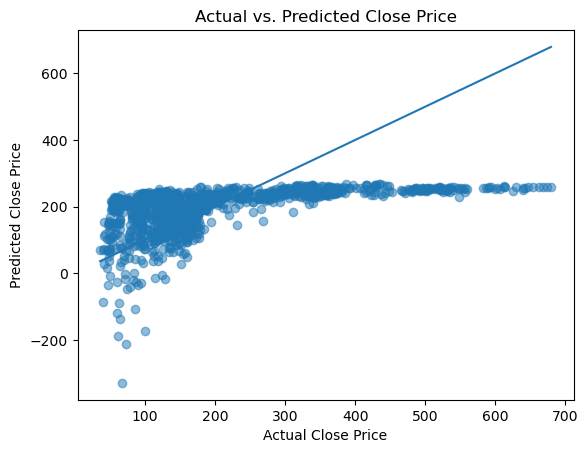

In [31]:
# Visualize the model
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()]),
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.show()